# **Machine Learning and Statistics Project**

***

Author: Roberto Vergano

**Python modules required**

In [63]:
import sklearn as sk
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from scipy.stats import shapiro
from tabulate import tabulate
import matplotlib.pyplot as plt
from scipy.stats import probplot
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.colors import ListedColormap

**Table of contents**
1. Project goal.
2. Supervised learning.
3. Classification algorithms.
4. Practical implementation.
5. Conclusion.
6. References.

### **1. Project goal**

The goal of this project is to develop a comprehensive notebook that delves into the application of classification algorithms on the Iris flower dataset, originally compiled by Ronald A. Fisher. It begins by introducing the concept of supervised learning, followed by a detailed explanation of what classification algorithms entail. The notebook will feature a practical implementation of one prevalent classification algorithm using the scikit-learn library in Python. Throughout, the notebook will incorporate various visual aids such as plots, mathematical symbols, and diagrams to effectively elucidate the underlying concepts. This approach aims to provide a clear, instructive, and visually engaging exploration of classification algorithms in the context of a well-known dataset.

### **2. Supervised learning**

### **3. Classification algorithms**

### **4. Practical implementation**

Logistic Regression  
K-Nearest Neighbors (KNN)

#### 4.1. Loading the dataset.

In [14]:
# Load the dataset.
dt = pd.read_csv("Datasets\iris.csv")
# info () to see a summary of the dataset.
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


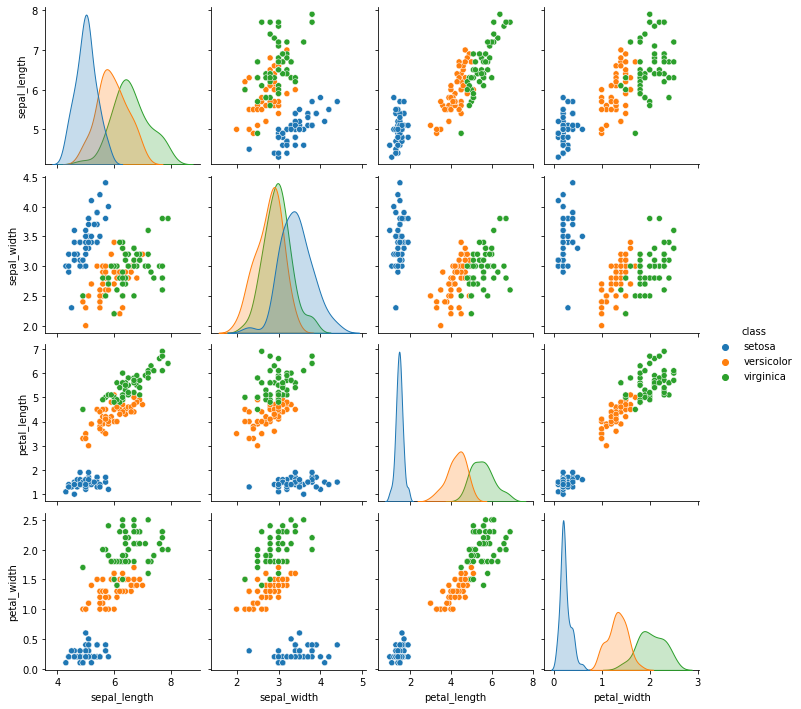

In [15]:
# Visualize the dataset
sns.pairplot(dt, hue ="class")

#### 4.2. Data preprocessing

In [16]:
# Check for missing values in the entire dataset
total_missing = dt.isnull().sum().sum()
print(f"Total missing values in the dataset: {total_missing}")

Total missing values in the dataset: 0


No need to drop any NaN values.

#### 4.3. Encoding Categorical Variables

Since there is a categorical variable ("class"), It should be converted into a numerical format, or 'encoded'. Encoding transforms categorical data into a numerical format that can be understood by the machine learning algorithm. 

Without encoding, the algorithms might misinterpret categorical data as continuous data and assign arbitrary numerical importance to categories based on their order or frequency.

Types of Encoding:

- Label Encoding: Assigns a unique integer to each category. 

- One-Hot Encoding: Creates a binary column for each category and is used when there is no ordinal relationship. 

The choice of encoding method for categorical data depends on the type of classifier used and the nature of the categorical variables (ordinal or nominal). 

For the purpose of this project, we will use One-hot encoding:
- Logistic regression is a linear model, assuming a linear relationship between the features and the odds of the probabilities. One-hot encoding ensures that each category is treated as a separate entity without implying any order.
- K-Nearest Neighbors (KNN) calculates the distance between points to determine the "nearest neighbors." With label encoding, numbers might be interpreted as having more weight or significance, which can skew the distance calculations. One-hot encoding ensures that each category is equidistant from each other and is given equal importance.

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [46]:
onehotencoder = OneHotEncoder()
y_encoded = onehotencoder.fit_transform(dt[['class']]).toarray() # toarray() for ensuring compability with the algorithms and simplifying the handling.

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

#### 4.4. Scaling

assumption - data is normally distributed - check that first for each class 
- do an histogram and then sharpiro test - copy and paste task 3

**Histogram**

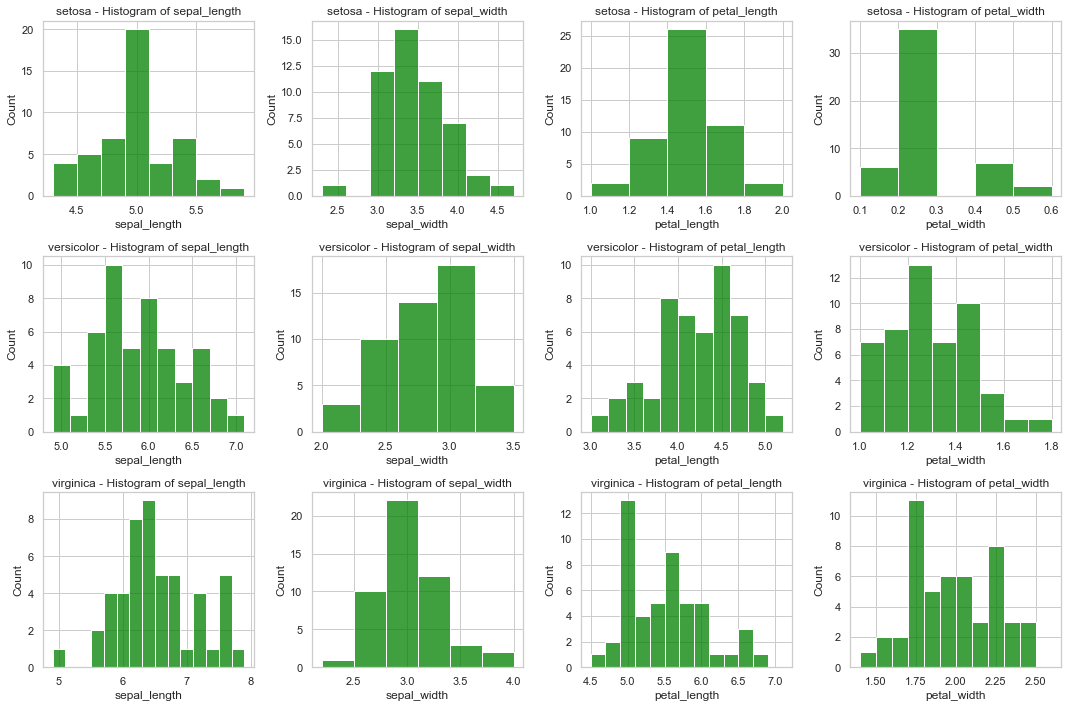

In [34]:
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Creating a figure with multiple subplots for each class
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))

# List of numerical features
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# List of classes
classes = dt['class'].unique()

# Specify the bin width for each feature
bin_widths = {'sepal_length': 0.2, 'sepal_width': 0.3, 'petal_length': 0.2, 'petal_width': 0.1}

# Plotting histograms for each class and each feature
for i, iris_class in enumerate(classes):
    for j, feature in enumerate(features):
        sns.histplot(data=dt[dt['class'] == iris_class], x=feature, binwidth=bin_widths[feature], color='green', ax=axes[i, j])
        axes[i, j].set_title(f'{iris_class} - Histogram of {feature}')

        
# Adjusting layout
plt.tight_layout()

**Shapiro-Wilk Test**

In [35]:
idf = dt

# Petal length variables per class:
petal_length_setosa = idf.loc[idf["class"] == "setosa", "petal_length"]
petal_length_versicolor = idf.loc[idf["class"] == "versicolor", "petal_length"]
petal_length_virginica = idf.loc[idf["class"] == "virginica", "petal_length"]

# Petal width variables per class: 
petal_width_setosa = idf.loc[idf["class"] == "setosa", "petal_width"]
petal_width_versicolor = idf.loc[idf["class"] == "versicolor", "petal_width"]
petal_width_virginica = idf.loc[idf["class"] == "virginica", "petal_width"]

# Sepal length variables per class:
sepal_length_setosa = idf.loc[idf["class"] == "setosa", "sepal_length"]
sepal_length_versicolor = idf.loc[idf["class"] == "versicolor", "sepal_length"]
sepal_length_virginica = idf.loc[idf["class"] == "virginica", "sepal_length"]

# Sepal width variables per class:
sepal_width_setosa = idf.loc[idf["class"] == "setosa", "sepal_width"]
sepal_width_versicolor = idf.loc[idf["class"] == "versicolor", "sepal_width"]
sepal_width_virginica = idf.loc[idf["class"] == "virginica", "sepal_width"]

# Function to perform the Shapiro-Wilk test and return the results as a dataframe:
def shapiro_test(data, label):
    stat, p_value = shapiro(data)
    return pd.DataFrame({
        "Variable": [label],
        "Statistic": [stat],
        "P-value": [p_value]
    })

# Concatenate the results into a single dataframe:
results = pd.concat([
    shapiro_test(petal_length_setosa, "Petal Length Setosa"),
    shapiro_test(petal_length_versicolor, "Petal Length Versicolor"),
    shapiro_test(petal_length_virginica, "Petal Length Virginica"),
    
    shapiro_test(petal_width_setosa, "Petal Width Setosa"),
    shapiro_test(petal_width_versicolor, "Petal Width Versicolor"),
    shapiro_test(petal_width_virginica, "Petal Width Virginica"),
    
    shapiro_test(sepal_length_setosa, "Sepal Length Setosa"),
    shapiro_test(sepal_length_versicolor, "Sepal Length Versicolor"),
    shapiro_test(sepal_length_virginica, "Sepal Length Virginica"),
    
    shapiro_test(sepal_width_setosa, "Sepal Width Setosa"),
    shapiro_test(sepal_width_versicolor, "Sepal Width Versicolor"),
    shapiro_test(sepal_width_virginica, "Sepal Width Virginica"),
], ignore_index=True)

# Display results in a table:
table = tabulate(results, headers="keys", tablefmt="fancy_grid", showindex=False)
print(table)

╒═════════════════════════╤═════════════╤═════════════╕
│ Variable                │   Statistic │     P-value │
╞═════════════════════════╪═════════════╪═════════════╡
│ Petal Length Setosa     │    0.954946 │ 0.0546492   │
├─────────────────────────┼─────────────┼─────────────┤
│ Petal Length Versicolor │    0.966005 │ 0.158483    │
├─────────────────────────┼─────────────┼─────────────┤
│ Petal Length Virginica  │    0.962186 │ 0.109774    │
├─────────────────────────┼─────────────┼─────────────┤
│ Petal Width Setosa      │    0.813817 │ 1.85258e-06 │
├─────────────────────────┼─────────────┼─────────────┤
│ Petal Width Versicolor  │    0.947627 │ 0.0272782   │
├─────────────────────────┼─────────────┼─────────────┤
│ Petal Width Virginica   │    0.959772 │ 0.0869574   │
├─────────────────────────┼─────────────┼─────────────┤
│ Sepal Length Setosa     │    0.977699 │ 0.459528    │
├─────────────────────────┼─────────────┼─────────────┤
│ Sepal Length Versicolor │    0.977836 │ 0.4647

**Petal width setosa and petal width versicolor - Probability plot**

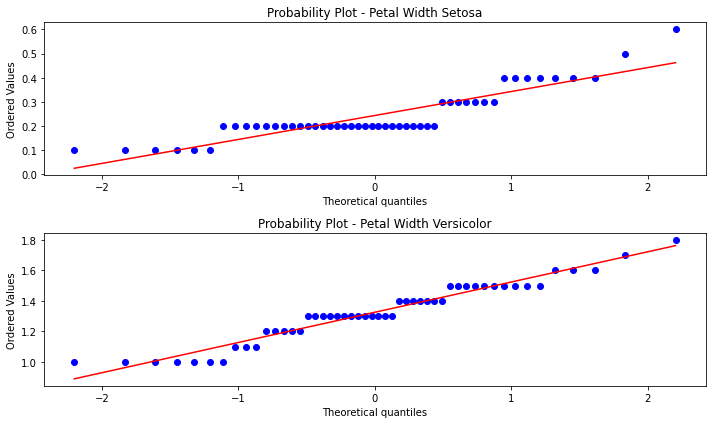

In [19]:
# Probplot for petal_width_setosa and petal_width_versicolor

# Probability plots for each variable:
plt.figure(figsize=(10, 6))

# Probability plot for Petal Width Setosa
plt.subplot(2, 1, 1)
probplot(petal_width_setosa, plot=plt)
plt.title('Probability Plot - Petal Width Setosa')

# Probability plot for Petal Width Versicolor
plt.subplot(2, 1, 2)
probplot(petal_width_versicolor, plot=plt)
plt.title('Probability Plot - Petal Width Versicolor')

plt.tight_layout()
plt.show()

In [20]:
# Create a standard scaler creating an instance, only with the numerical value!
# check the distances between values to justify the scaler# Euclidean distance - first step.
# fit the data to the scaler 

**Scaling the dataset**

#### 4.5. Splitting into training and test sets

 - manhattan distance
 - euclidian distance

 see scikit learn - examples for KNN
 https://scikit-learn.org/stable/auto_examples/neighbors/plot_nearest_centroid.html#sphx-glr-auto-examples-neighbors-plot-nearest-centroid-py

 do some validation or evaluation
 - **cross-validation**

In [62]:
# Preprocess the Data
X = dt.drop('class', axis=1)
y = dt['class']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and Train the KNN Model
knn = KNeighborsClassifier(n_neighbors=5) # Using K=5 as an example
knn.fit(X_train, y_train)

# Model Evaluation
y_pred = knn.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)

# Converting classification report to a DataFrame for better presentation
class_report_df = pd.DataFrame(class_report).transpose()


In [56]:
class_report_df

,precision,recall,f1-score,support
setosa,1.0,1.0,1.0,10.0
versicolor,1.0,1.0,1.0,9.0
virginica,1.0,1.0,1.0,11.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,30.0
weighted avg,1.0,1.0,1.0,30.0


<Figure size 720x576 with 0 Axes>

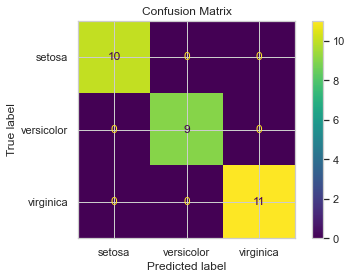

In [60]:
# Displaying the Confusion Matrix
plt.figure(figsize=(10, 8))
ConfusionMatrixDisplay(conf_matrix, display_labels=knn.classes_).plot(values_format='.0f')
plt.title('Confusion Matrix')
plt.show()

In [70]:
from sklearn.model_selection import cross_val_score

# Create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=5)

# Applying 5-fold cross-validation
# X and y are your features and target variable from the entire dataset, not split into train/test
cv_scores = cross_val_score(knn_cv, X, y, cv=5)

# The scores for each fold
print("Cross-validation scores for each fold:", cv_scores)

# Mean and standard deviation of the scores
print("Mean cross-validation score:", cv_scores.mean())
print("Standard deviation of cross-validation scores:", cv_scores.std())


Cross-validation scores for each fold: [0.73333333 0.73333333 0.76666667 0.83333333 0.73333333]
Mean cross-validation score: 0.76
Standard deviation of cross-validation scores: 0.038873012632302036


#### 4.6. Exploring KNN

#### 4.7. Exploring Logistic Regression

### **5. Conclusion**

### **6. References**